In [2]:
# The autoreload extension allows you to tweak the code in the imported modules (`pp`)
# and rerun cells to reflect the changes.
%load_ext autoreload
%autoreload 2
%reload_ext ipy_dict_hierarchy

import sys
sys.path.append("../ana/")

import paper_plots as pp
pp.log.setLevel("WARNING")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model of Spiking Neurons


    Wrapper for Figure 3 on Simulations containing
    - pooled Violins that aggregate the results of all trials for
        * Event size and Correlation Coefficient
        * at 0Hz vs 20Hz additional stimulation in targeted modules (on top of 80Hz baseline)
    - Decomposition plots (scatter and bar) anaologous to Figure 2
    


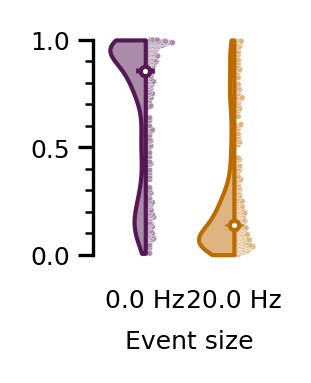

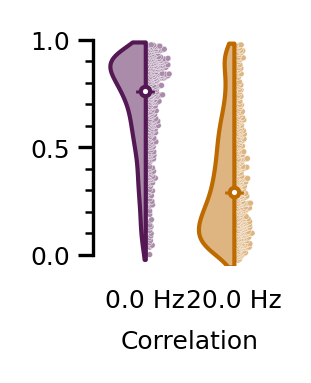

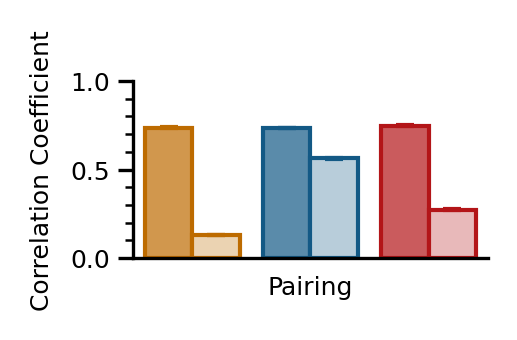

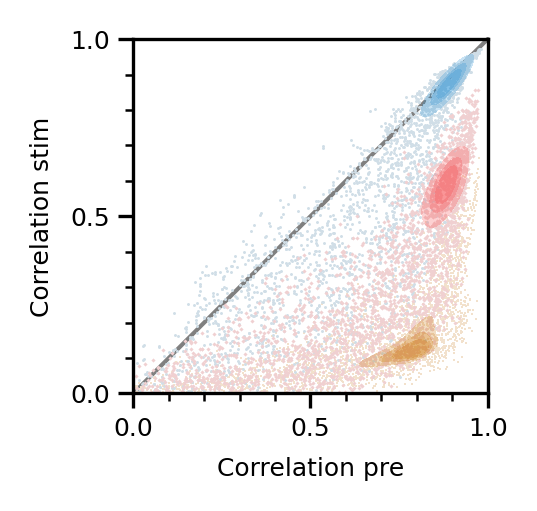

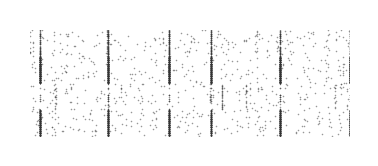

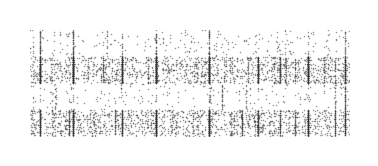

In [2]:
print(pp.fig_3.__doc__)
pp.fig_3()

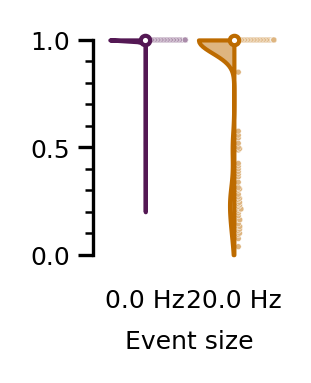

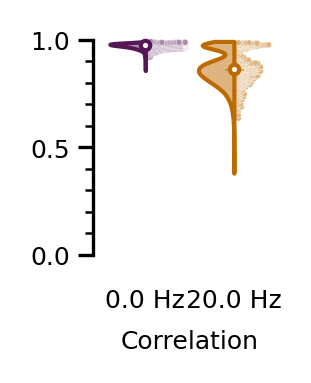

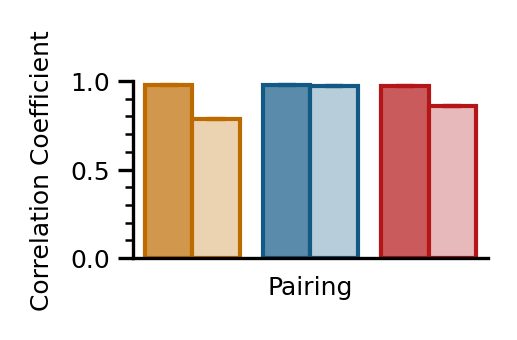

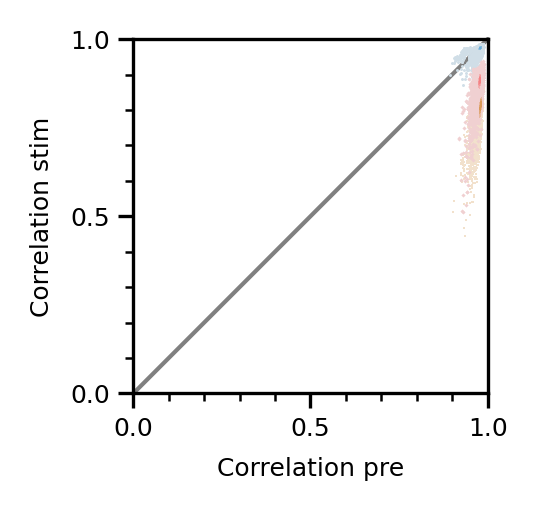

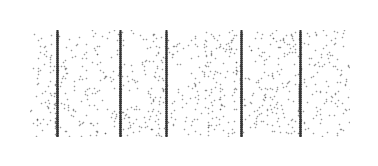

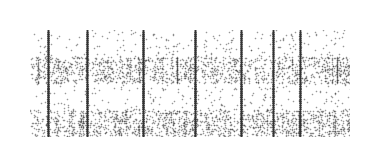

In [3]:
# to reproduce the figure 3 for the case with blocked inhibition,
# we need to tweak the file paths a bit:
pp.fig_3(
    # processed data frame
    pd_path=f"{pp.p_sim}/lif/processed/k=5_partial_no_inhib.hdf5",
    # raw data for rasters, note jG=0
    raw_paths=[
        f"{pp.p_sim}/lif/raw/stim=02_k=5_jA=45.0_jG=0.0_jM=15.0_tD=20.0_rate=80.0_stimrate=0.0_rep=001.hdf5",
        f"{pp.p_sim}/lif/raw/stim=02_k=5_jA=45.0_jG=0.0_jM=15.0_tD=20.0_rate=80.0_stimrate=20.0_rep=001.hdf5",
    ],

)


    Wrapper for Figure 4 (extended) on Simulations containing
    - As a function of increasing Synaptic Noise Rate:
        * For k=5, the "Fraction of events that span"
            across 4 (dark), 3, 2, or only 1 modules (light)
        * For k=1 (lightest), k=5, k=10 and merged (darkest)
            - Mean Event size (Fraction of neurons that contribute to the event)
            - Mean Correlation Coefficient (neuron pairs)
            - Median and Mean rij (module pairs)
            - Functional Complexity
            - Average Number of spikes each neuron fired during a detected event
            - Inter-event interval
            - Core delay (the delay between the time points of each involved
                modules maximum firing rate)
            - The average amount of synaptic resources at the time of the starting
                of the bursting event
    - Optionally, example raster plots
        * A sketch of the topology
        * Population-level rates in Hz (top)
    

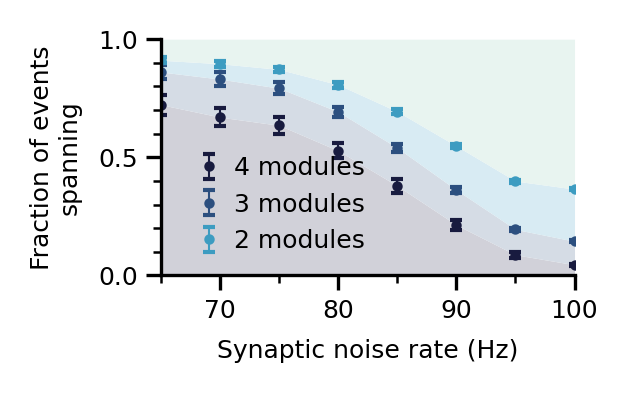

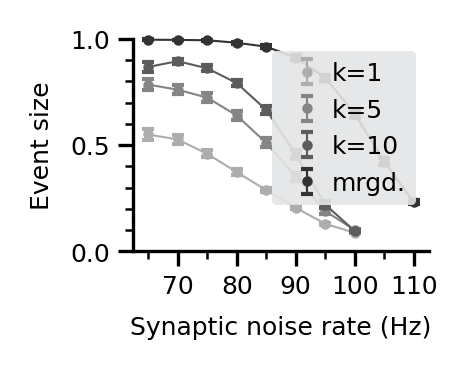

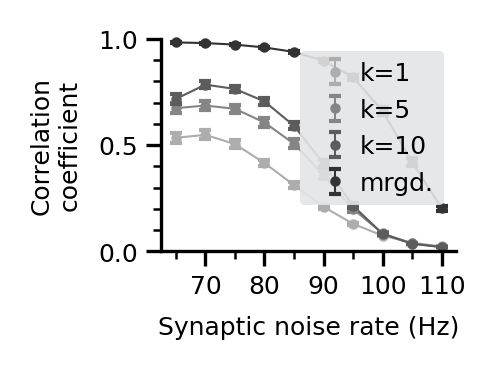

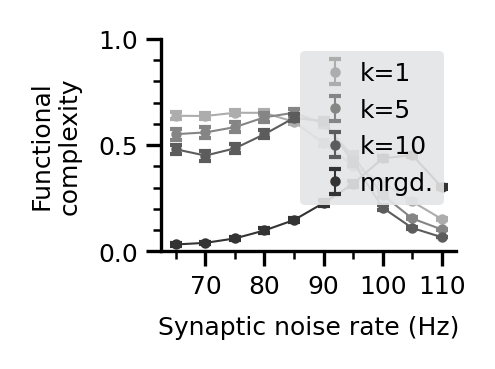

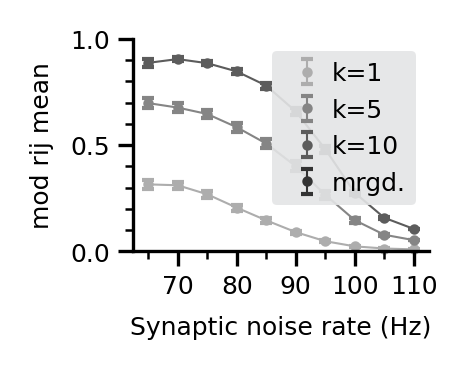

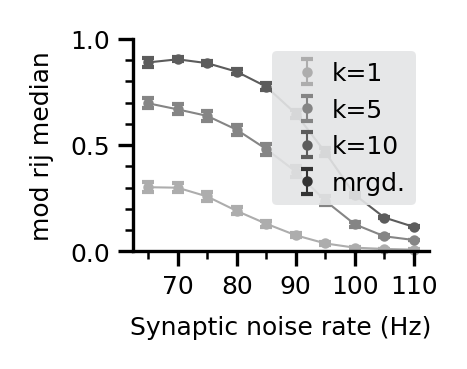

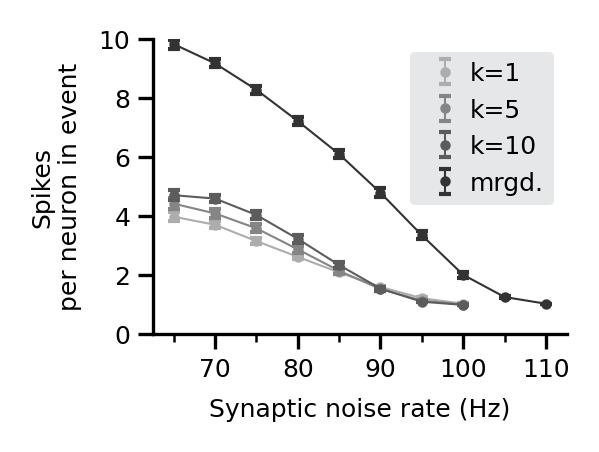

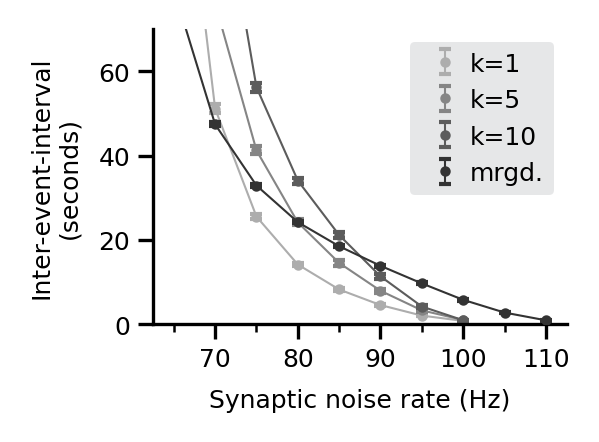

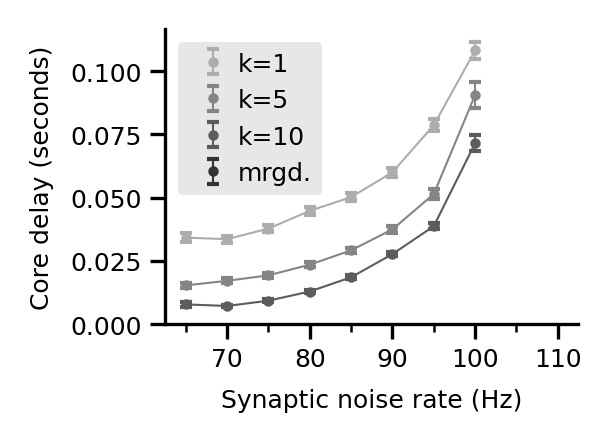

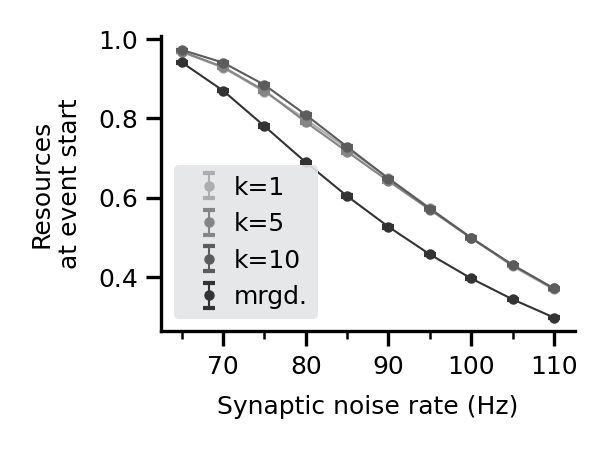

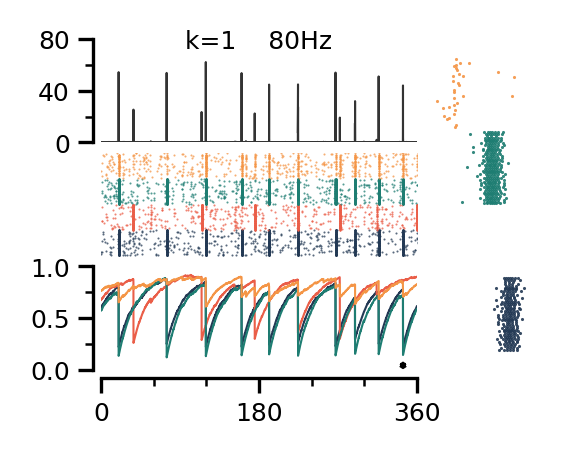

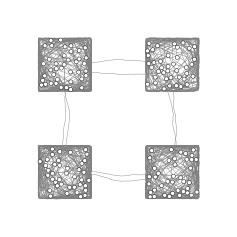

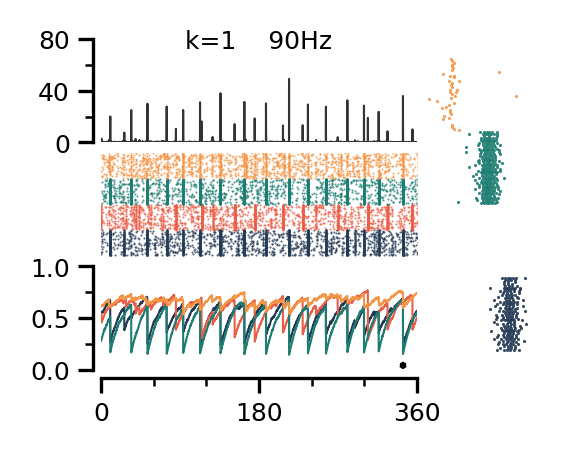

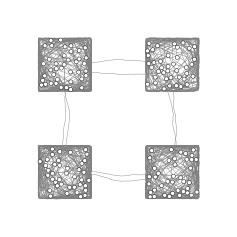

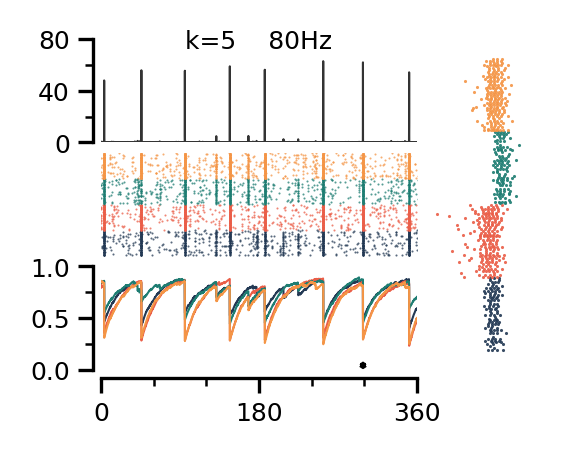

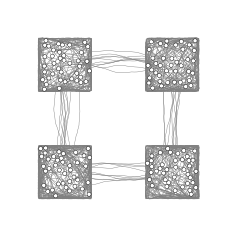

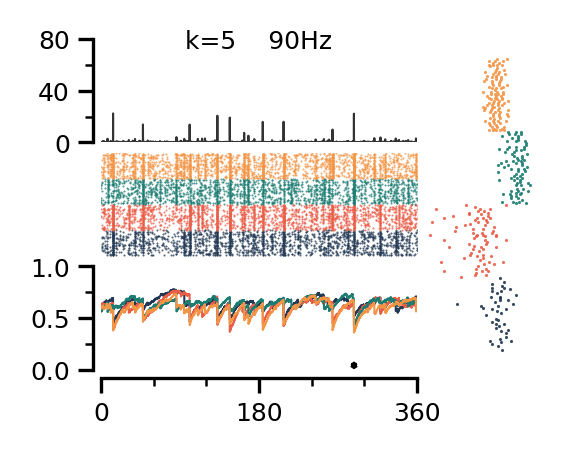

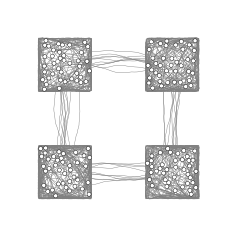

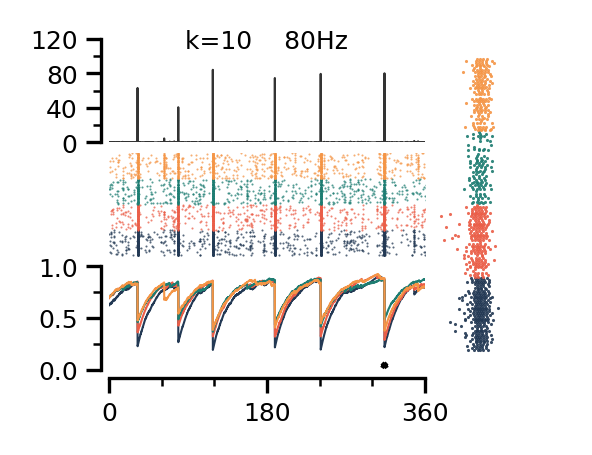

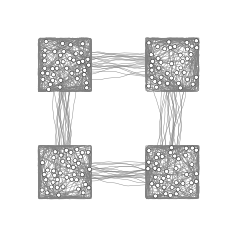

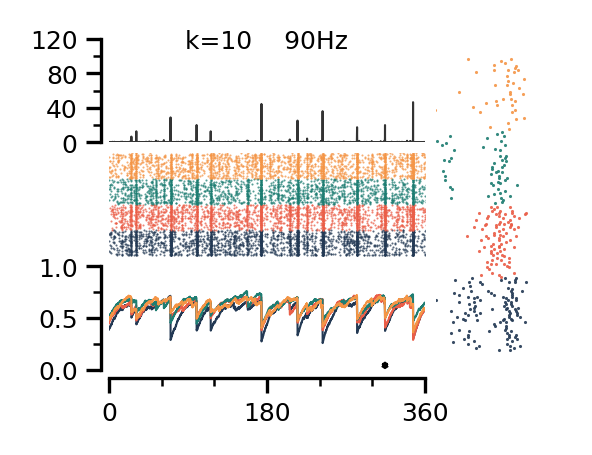

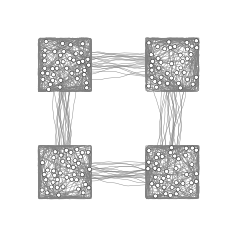

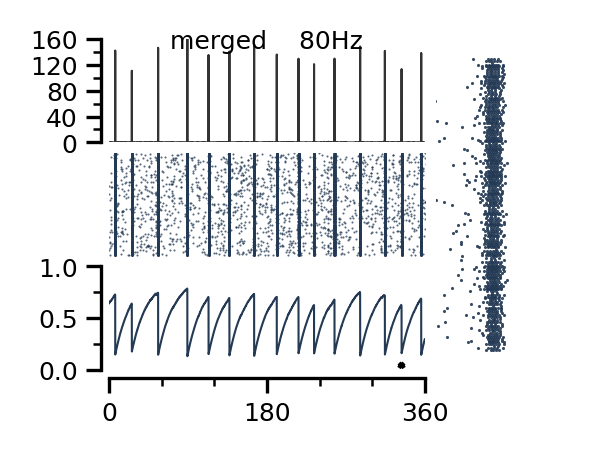

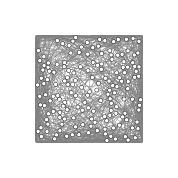

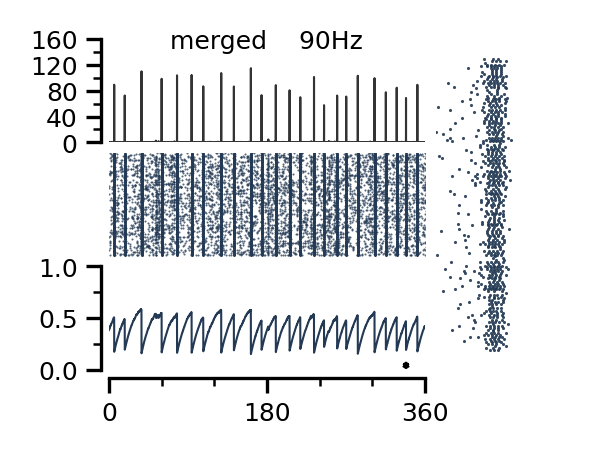

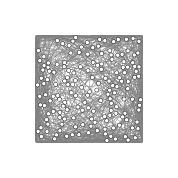

In [4]:
print(pp.fig_4.__doc__)
pp.show_legend=True
pp.fig_4(
    skip_rasters=False,
    # plotting resource cycles takes very long.
    skip_cycles=True,
)

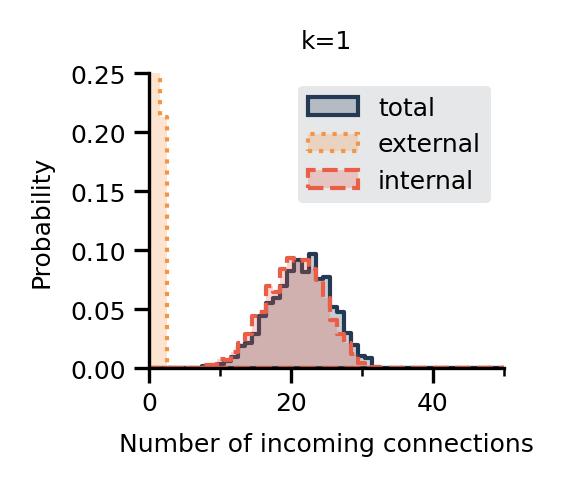

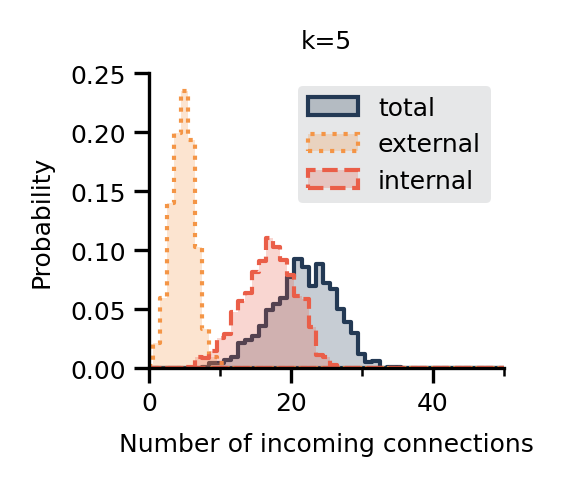

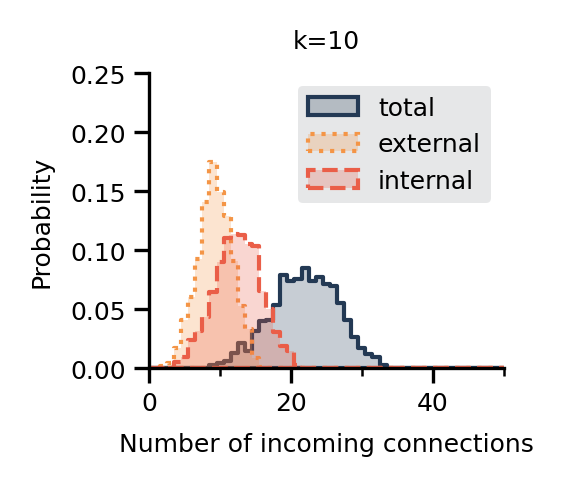

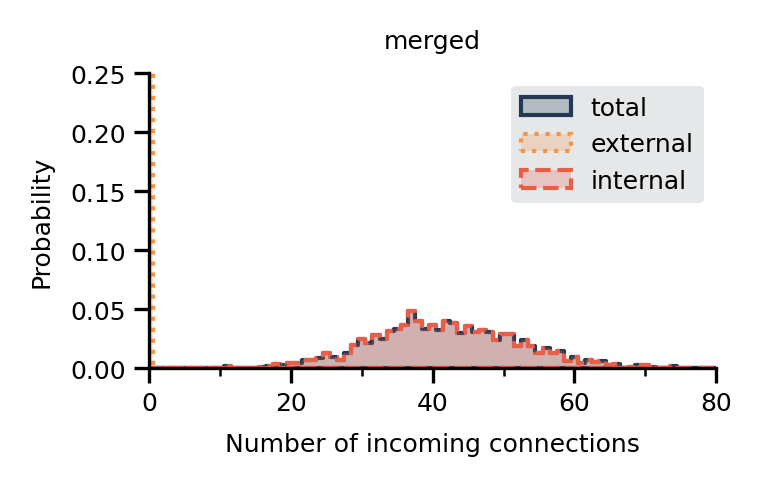

In [5]:
# inhomogeneous degree distribtions
for k in [1, 5, 10, -1]:
    pp.sim_degrees_sampled(k_inter=k, num_reps=10)

# Mesoscopic Model


    Wrapper for Figure 5 (extended) on Mesoscopic model containing
    - As a function of increasing External input h:
        * Module-level correlation coefficients (mean)"
            - for different coupling values (low coupling light, high coupling dark)
            - Note that this is only loosely comparable to the rij of the neuron model
            as those were pairwise correlations.
        * The average number of modules that contributed in an event (like in Fig 4)
            - one panel for each coupling value
            - dark blue: 4 modules, ... light: 1 module
    - A sketch of the Resrouces vs Probability to disconnect.

    


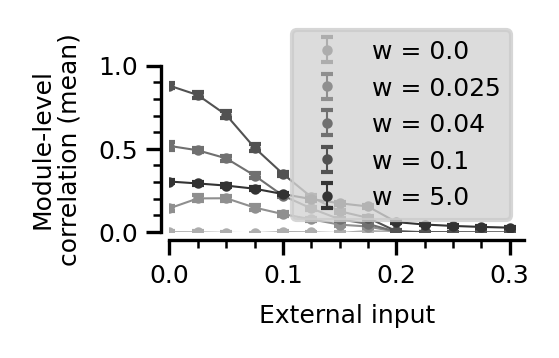

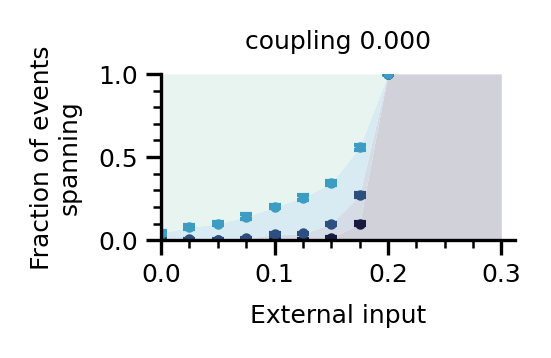

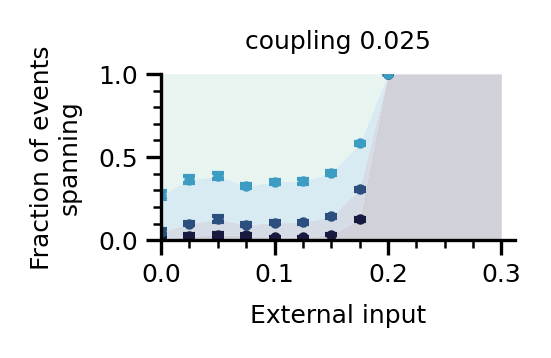

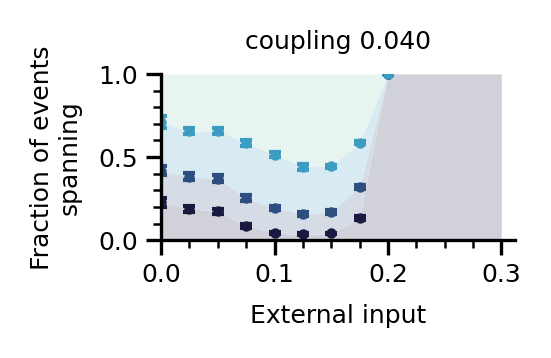

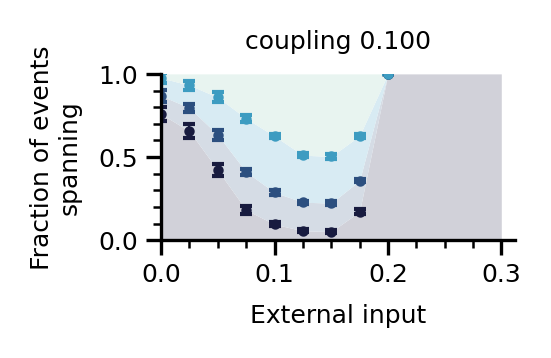

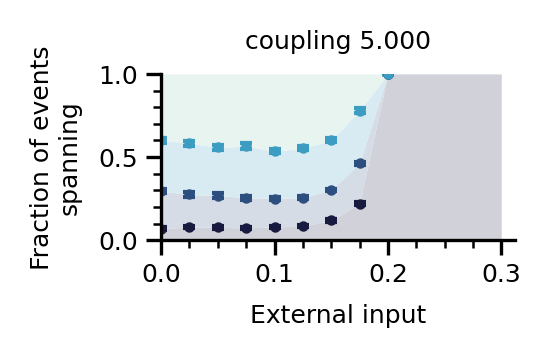

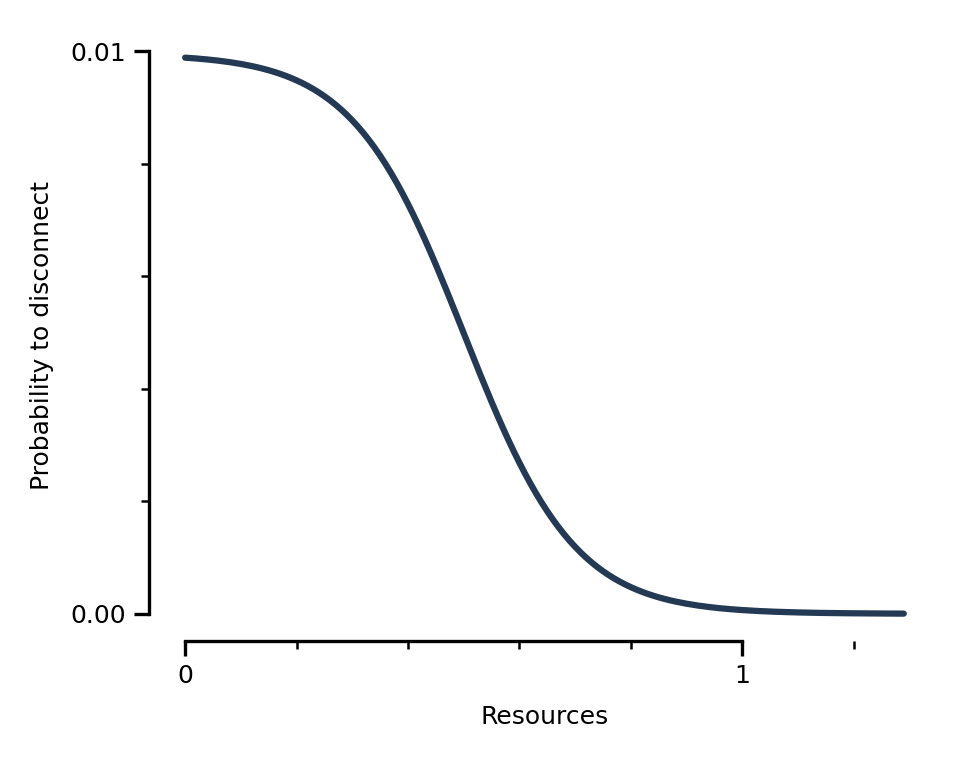

In [20]:
pp.log.setLevel("WARNING")
print(pp.fig_5.__doc__)
pp.fig_5()

None


22-08-10 17:21 | WARNING  | bitsandbobs.plt.tweaks | `detick()` is deprecated. Really, `ax.tick_params` has all you need.
22-08-10 17:21 | WARNING  | bitsandbobs.plt.tweaks | `detick()` is deprecated. Really, `ax.tick_params` has all you need.
22-08-10 17:21 | WARNING  | bitsandbobs.plt.tweaks | `detick()` is deprecated. Really, `ax.tick_params` has all you need.
22-08-10 17:21 | WARNING  | bitsandbobs.plt.tweaks | `detick()` is deprecated. Really, `ax.tick_params` has all you need.
22-08-10 17:21 | WARNING  | bitsandbobs.plt.tweaks | `detick()` is deprecated. Really, `ax.tick_params` has all you need.
22-08-10 17:21 | WARNING  | bitsandbobs.plt.tweaks | `detick()` is deprecated. Really, `ax.tick_params` has all you need.
22-08-10 17:22 | WARNING  | bitsandbobs.plt.tweaks | `detick()` is deprecated. Really, `ax.tick_params` has all you need.
22-08-10 17:22 | WARNING  | bitsandbobs.plt.tweaks | `detick()` is deprecated. Really, `ax.tick_params` has all you need.
22-08-10 17:22 | WARNING

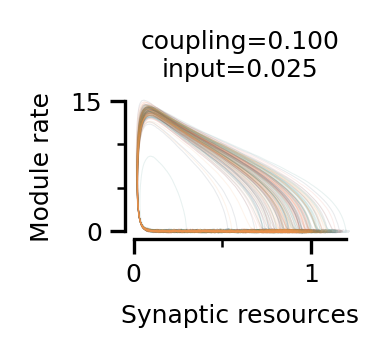

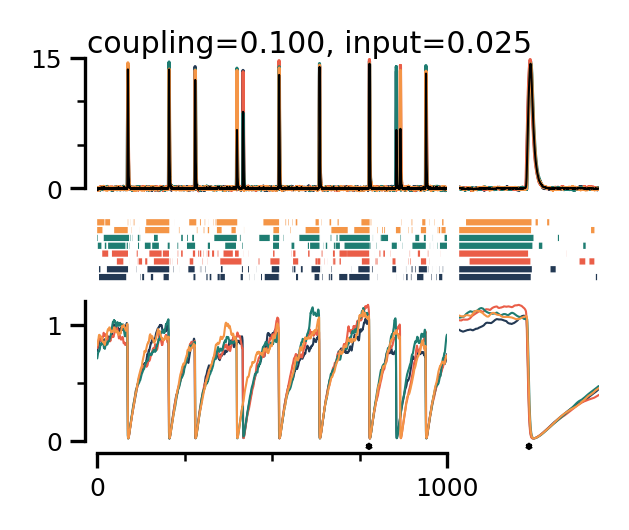

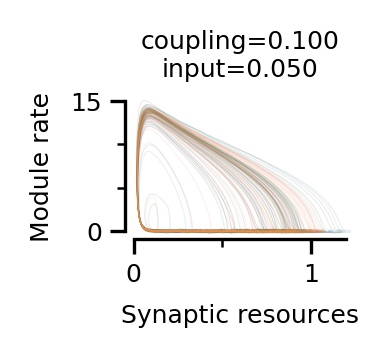

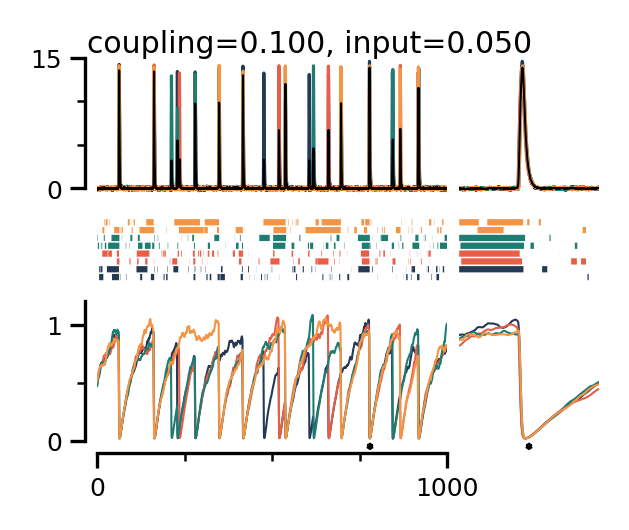

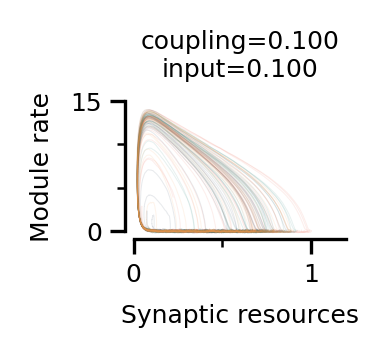

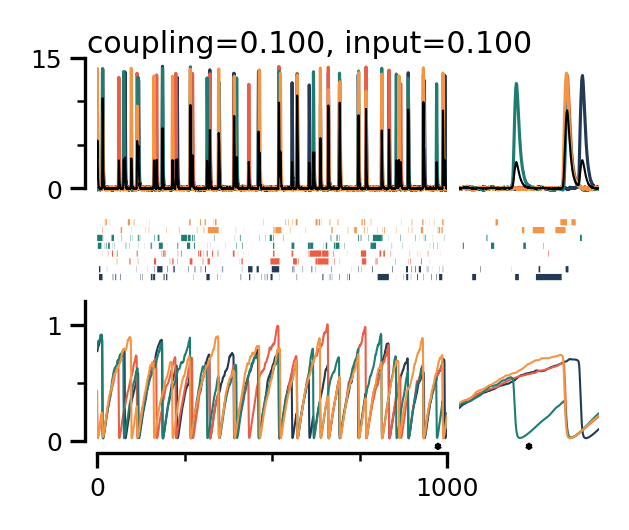

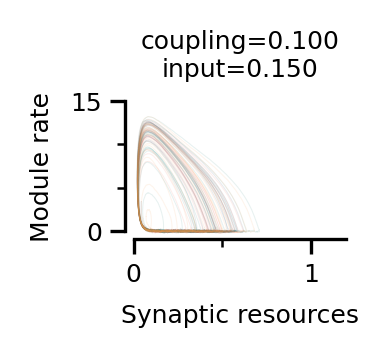

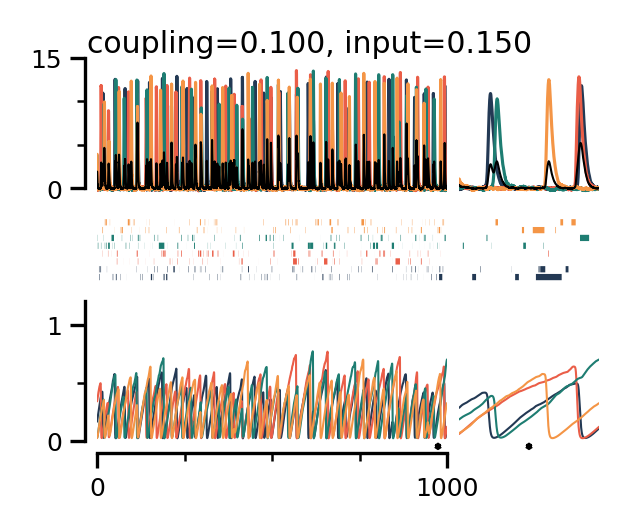

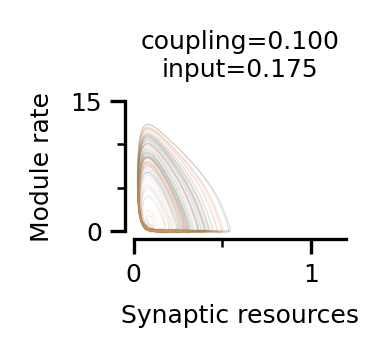

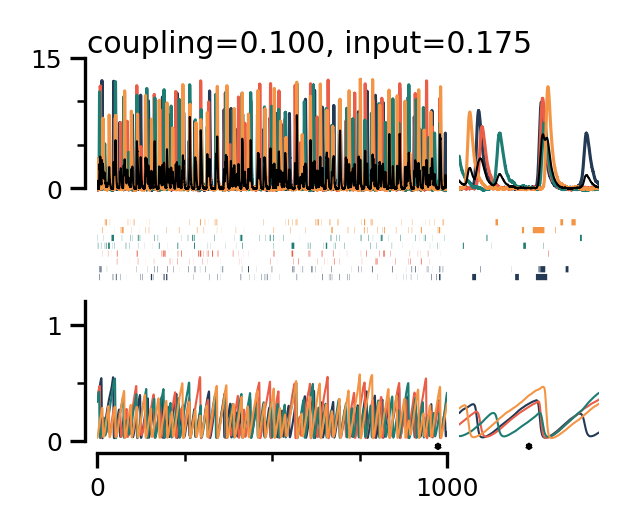

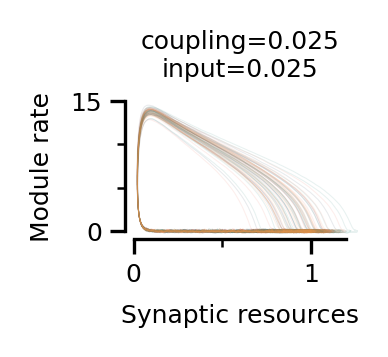

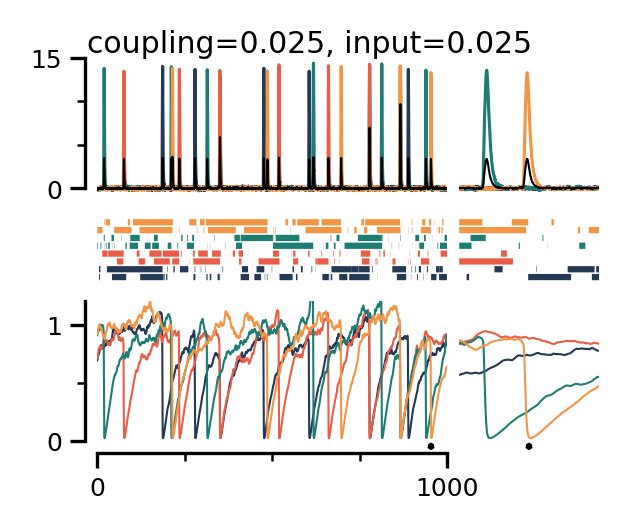

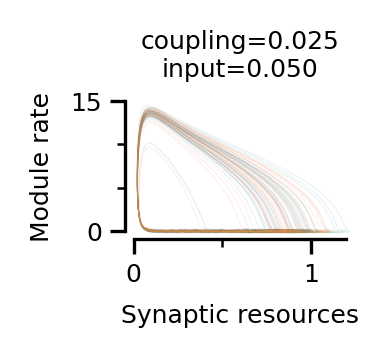

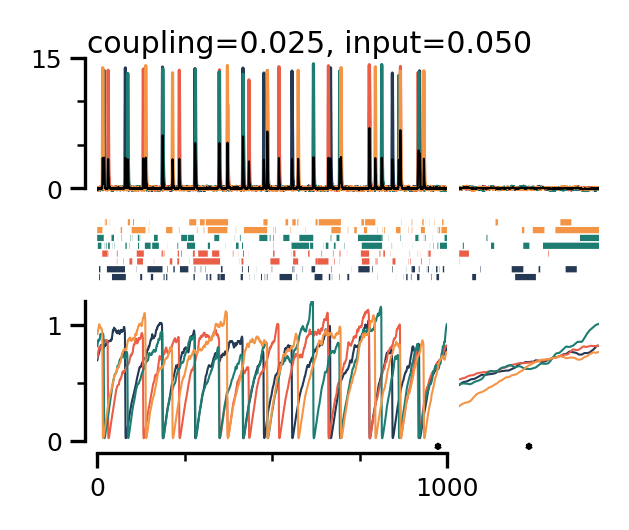

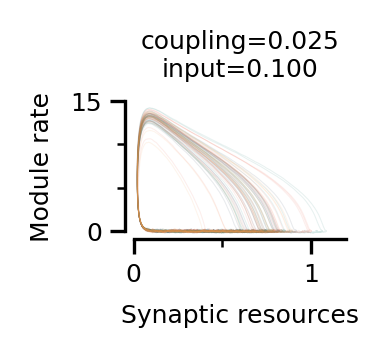

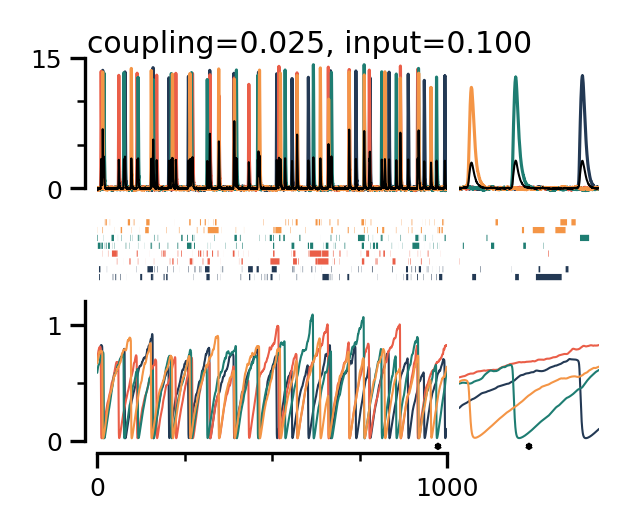

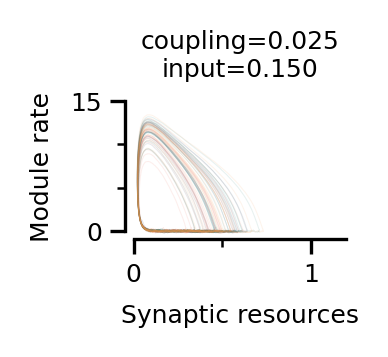

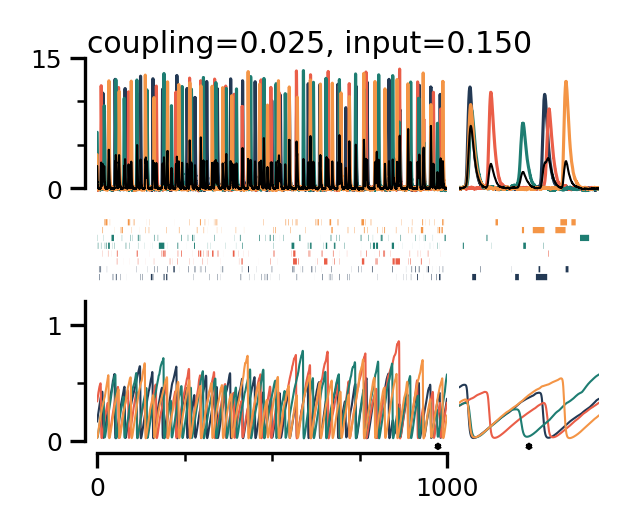

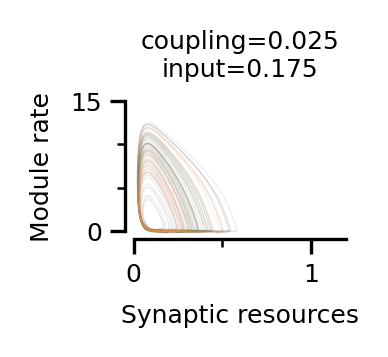

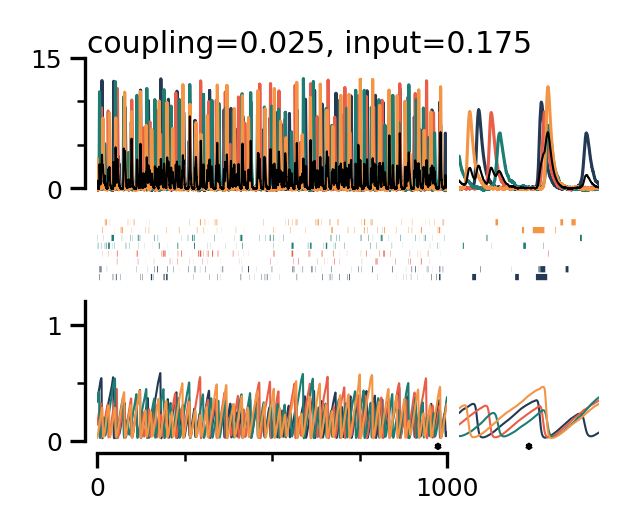

In [25]:
print(pp.fig_5_snapshots.__doc__)
pp.fig_5_snapshots()

<AxesSubplot:xlabel='noise', ylabel='mean_correlation_coefficient'>

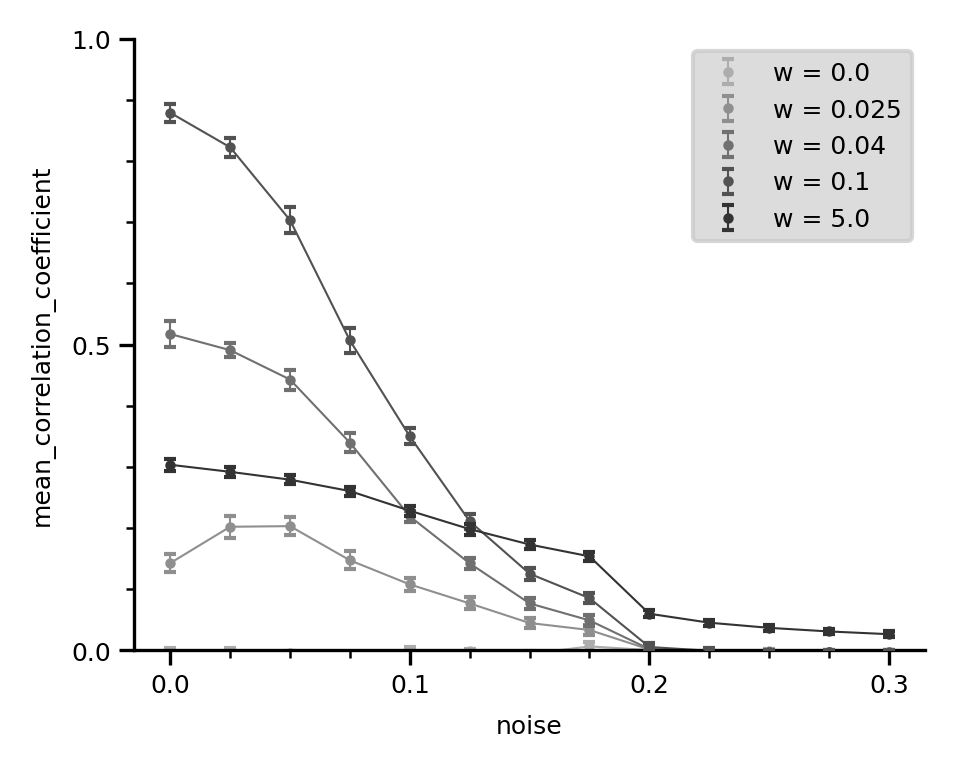

In [22]:
import xarray as xr
dset = xr.load_dataset(f"{pp.p_sim}/meso/processed/analysed.hdf5")
pp.meso_obs_for_all_couplings(dset, "mean_correlation_coefficient")

# TODO:
* update meso launcher path + comment about path and _long_ts
* show explore single for meso and brian